In [25]:
import dataset_utils as dataset

from Keras import *

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from dataset_utils import skl_arange_dataset

In [26]:
dev_data = dataset.load_dataset("../data/ML-CUP23-TR.csv")
blind_data = dataset.load_dataset("../data/ML-CUP23-TS.csv")

# arange the dataset into inputs and labels
X_dev, y_dev, X_blind, train_folds, val_folds = skl_arange_dataset(dev_data, blind_data, scaler=StandardScaler(),
                                                                   folds=5)

# Keras

In [27]:
parameters = [
    {'optimizer': 'SGD', 'learning_rate': [0.01, 0.005, 0.001, 0.0005, 0.0001],
     'weight_decay': [0.0, 0.001, 0.0001, 0.0005],
     'momentum': [0.9, 0.75], 'nesterov': [True, False]}
]

In [28]:
grid = False

In [29]:
if grid:
    layer_configuration = [
        ('dense', 150),
        ('dense', 150),
        ('dense', 150),
        ('dense', 150)
    ]
    print(f"Layer configuration: {layer_configuration}")
    best_keras_params, res_values = keras_grid_search(model_builder=keras_mlp, parameters=parameters,
                                                                 model_layers=layer_configuration,
                                                                 train_data=train_folds, val_data=val_folds,
                                                                 verbose=0)
    print(f"Best combo: {best_keras_params}, with values: {res_values}")

Epoch 1/150
25/25 [==============================] - 0s 7ms/step - loss: 355.0819 - mee: 27.8711 - val_loss: 105.2448 - val_mee: 16.8632 - lr: 0.0050
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 57.2961 - mee: 12.0745 - val_loss: 35.0227 - val_mee: 9.0173 - lr: 0.0050
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 26.6890 - mee: 7.7982 - val_loss: 26.5371 - val_mee: 7.4825 - lr: 0.0050
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 22.3367 - mee: 7.0259 - val_loss: 24.8241 - val_mee: 7.1950 - lr: 0.0050
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 21.0034 - mee: 6.7891 - val_loss: 23.8052 - val_mee: 6.9912 - lr: 0.0050
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 20.1774 - mee: 6.6271 - val_loss: 23.2817 - val_mee: 6.8647 - lr: 0.0050
Epoch 7/150
25/25 [==============================] - 0s 4ms/step - loss: 19.5979 - mee: 6.4657 - val_loss: 22.8667 - va

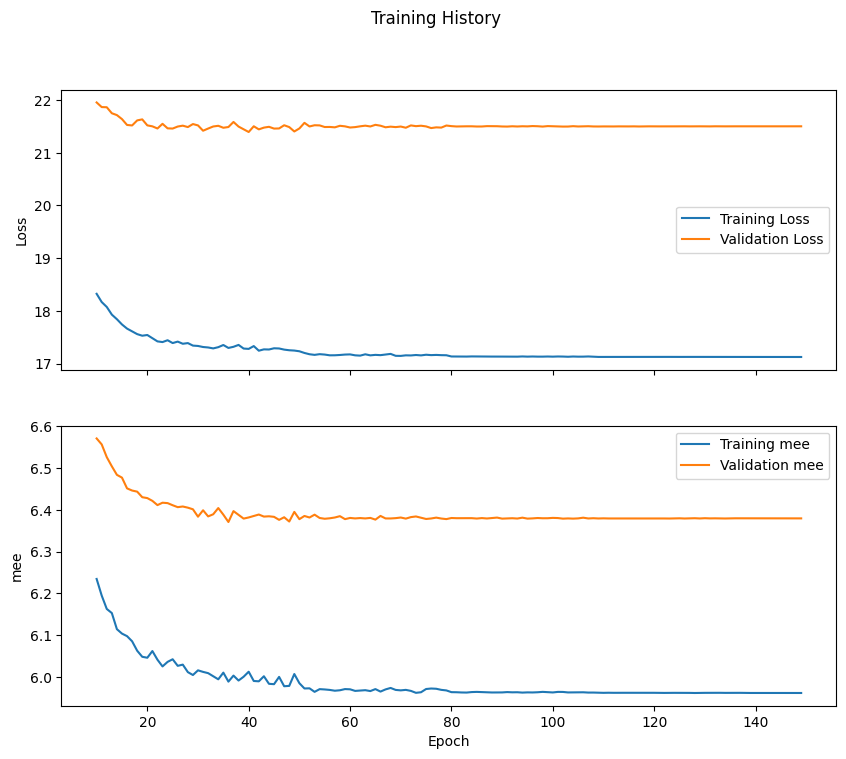

In [30]:
#Best parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'momentum': 0.9, 'nesterov': True, 'optimizer': 'SGD'}, with values: (18.03679656982422, 18.47313709259033)
model_to_test = keras_mlp([
    ('dense', 300),
    ('dense', 300),
    ('dense', 300),
    ('dense', 300)
])
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, cooldown=20, verbose=1,
                      factor=0.25,
                      min_lr=1e-7,
                      min_delta=1e-7)
]
history = keras_train(model_to_test, train_data=(X_dev, y_dev), epochs=150,
                      optimizer=k.optimizers.SGD(learning_rate=0.005, momentum=0.9, weight_decay=0.001, nesterov=True),
                      callback=callbacks)
plot_keras_history(history)

Epoch 1/150
25/25 [==============================] - 0s 7ms/step - loss: 261.3223 - mee: 23.1287 - val_loss: 54.3786 - val_mee: 11.4185 - lr: 0.0100
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 30.6949 - mee: 8.4657 - val_loss: 26.6029 - val_mee: 7.5717 - lr: 0.0100
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 21.6729 - mee: 6.9181 - val_loss: 23.6834 - val_mee: 6.9144 - lr: 0.0100
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 19.5996 - mee: 6.4920 - val_loss: 22.9737 - val_mee: 6.7438 - lr: 0.0100
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 18.8423 - mee: 6.3437 - val_loss: 22.1582 - val_mee: 6.6453 - lr: 0.0100
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 18.3958 - mee: 6.2349 - val_loss: 21.9293 - val_mee: 6.5453 - lr: 0.0100
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 18.1177 - mee: 6.1971 - val_loss: 21.7020 - val_

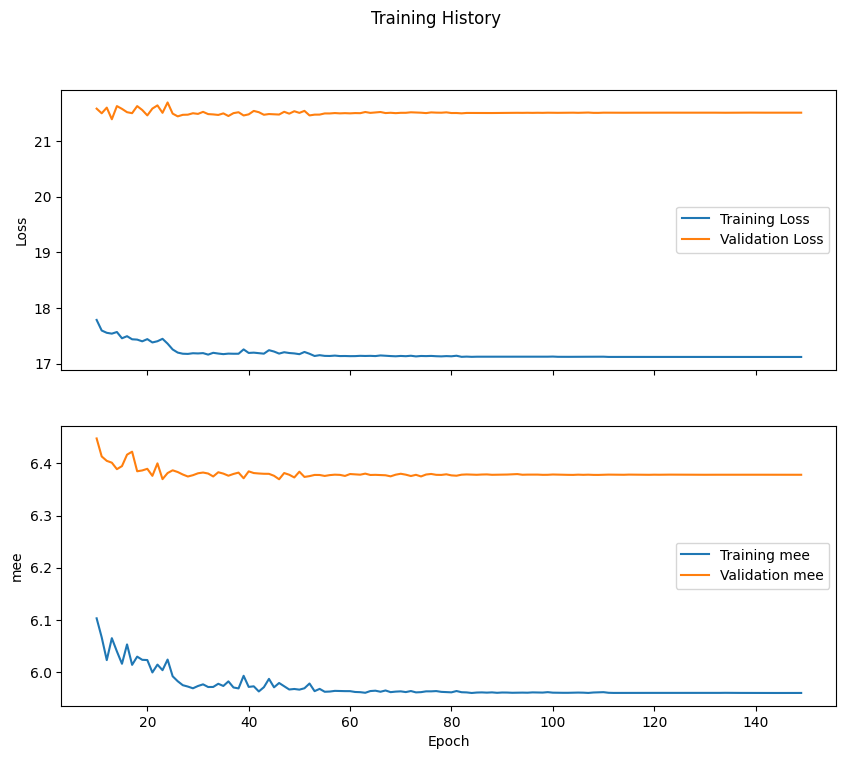

In [31]:
model_to_test = keras_mlp([
    ('dense', 150),
    ('dense', 50),
    ('dense', 25)
])

optim = k.optimizers.SGD(learning_rate=0.01, momentum=0.9, weight_decay=0.0001, nesterov=True)

hst = keras_train(model_to_test, train_data=(X_dev, y_dev), epochs=150,
                  optimizer=optim, callback=callbacks)

plot_keras_history(hst)


Epoch 1/150
25/25 [==============================] - 0s 7ms/step - loss: 282.1936 - mee: 24.4254 - val_loss: 66.2341 - val_mee: 12.4511 - lr: 0.0100
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 35.8719 - mee: 9.1015 - val_loss: 28.2991 - val_mee: 7.8609 - lr: 0.0100
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 22.1642 - mee: 7.0199 - val_loss: 23.6256 - val_mee: 6.9111 - lr: 0.0100
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 19.6854 - mee: 6.5189 - val_loss: 22.9268 - val_mee: 6.7698 - lr: 0.0100
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 18.9256 - mee: 6.3687 - val_loss: 22.3149 - val_mee: 6.6359 - lr: 0.0100
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 18.4073 - mee: 6.2496 - val_loss: 22.0838 - val_mee: 6.5841 - lr: 0.0100
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 18.1345 - mee: 6.2027 - val_loss: 21.9945 - val_

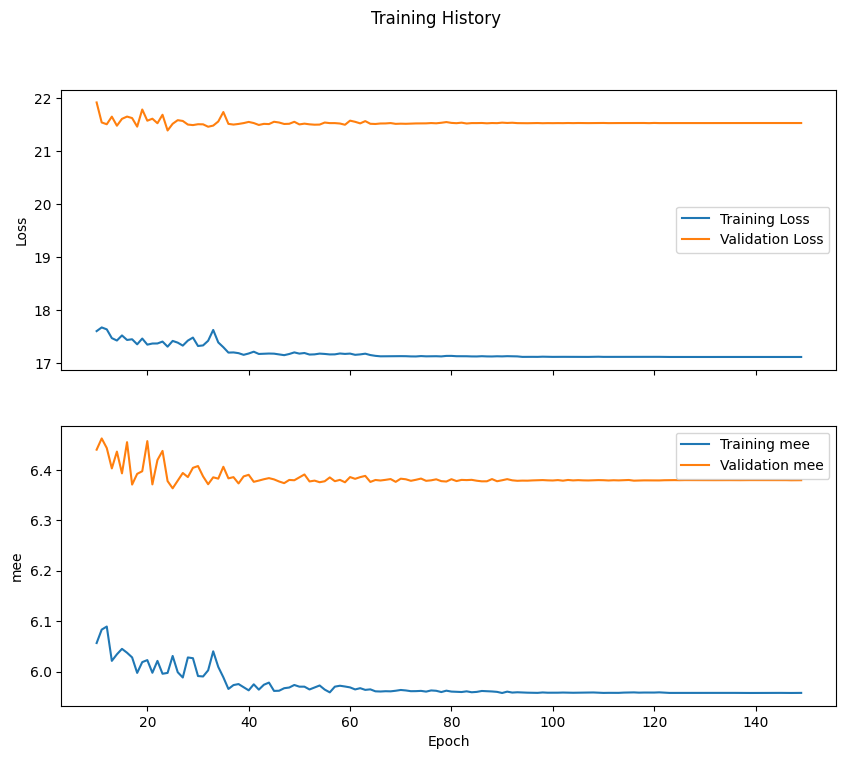

In [32]:
model_to_test = keras_mlp([
    ('dense', 25),
    ('dense', 50),
    ('dense', 150)
])
# Best parameters: {'learning_rate': 0.01, 'weight_decay': 0.0005, 'momentum': 0.9, 'nesterov': False, 'optimizer': 'SGD'}

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, cooldown=20, verbose=1,
                      factor=0.25,
                      min_lr=1e-7,
                      min_delta=1e-7)
]
optim = k.optimizers.SGD(learning_rate=0.01, momentum=0.9, weight_decay=0.0005, nesterov=False)
hst = keras_train(model_to_test, train_data=(X_dev, y_dev), epochs=150,
                  optimizer=optim, callback=callbacks)
plot_keras_history(hst)

In [33]:
model_to_test = keras_mlp([
    ('dense', 300),
    ('dense', 300),
    ('dense', 150),
    ('dense', 150)
])
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, cooldown=20, verbose=1,
                      factor=0.25,
                      min_lr=1e-7,
                      min_delta=1e-7)
]

optim = k.optimizers.SGD(learning_rate=0.001, momentum=0.9, weight_decay=0.001, nesterov=True)
hst = keras_train(model_to_test, train_data=(X_dev, y_dev), epochs=150,
                  optimizer=optim, callback=callbacks)

Epoch 1/150
25/25 [==============================] - 1s 11ms/step - loss: 623.6571 - mee: 38.2057 - val_loss: 514.3976 - val_mee: 34.9546 - lr: 0.0010
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 347.6539 - mee: 28.4534 - val_loss: 277.9753 - val_mee: 26.0436 - lr: 0.0010
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 201.1728 - mee: 22.1343 - val_loss: 172.4545 - val_mee: 20.7666 - lr: 0.0010
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 133.3070 - mee: 18.3060 - val_loss: 116.7788 - val_mee: 17.2545 - lr: 0.0010
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 95.0276 - mee: 15.5985 - val_loss: 86.4225 - val_mee: 14.8504 - lr: 0.0010
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 72.2632 - mee: 13.5863 - val_loss: 67.5946 - val_mee: 13.0538 - lr: 0.0010
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 57.4543 - mee: 12.0429 - val_l

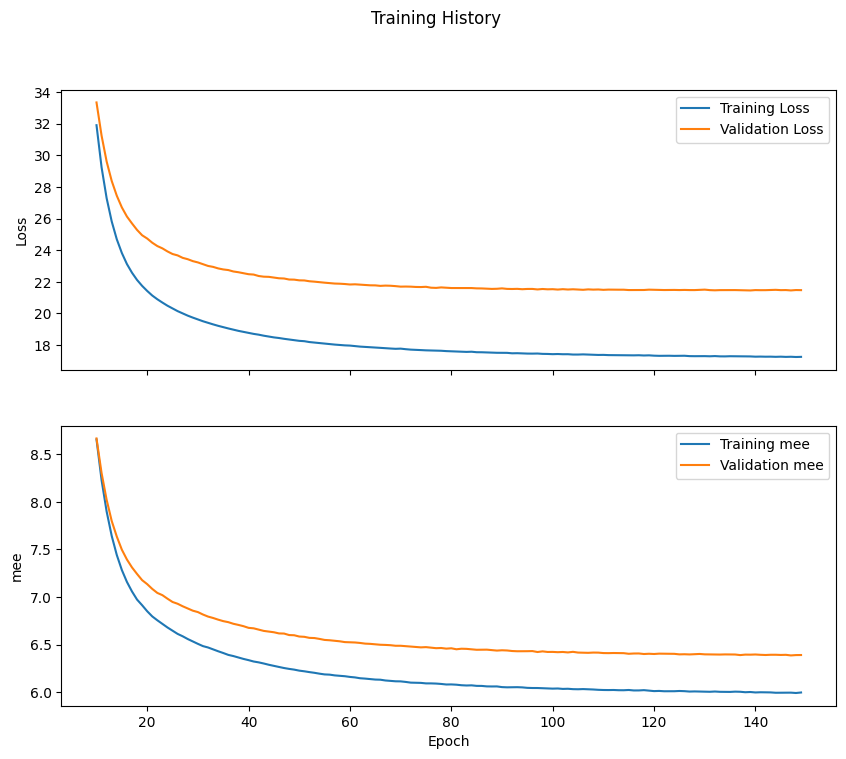

In [34]:
plot_keras_history(hst)